In [93]:
import pandas as pd
import sklearn.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [94]:
def MakeData(Name, colsize):#(읽을 Bench name, column 수)
    tmp = pd.read_csv(("Desktop/Modify/"+str(Name)+".csv"), sep=";", header=1, na_filter=False)
    #tmp = tmp.drop(columns=["Unnamed: 205","Date","C2res%","C3res%.1","C6res%.1","C7res%.1","C8res%","C9res%","C10res%"])
    tmp = tmp.drop(columns=["Date","Proc_Energy_(Joules)","FREQ","AFREQ","C2res%","C3res%.1","C6res%.1","C7res%.1"])
    #tmp = tmp.drop(columns=["EXEC","IPC","L3MISS","L2MISS","L3HIT","L2HIT","L3MPI","L2MPI","READ","WRITE","INST","ACYC","TIME(ticks)","PhysIPC","PhysIPC%","INSTnom","INSTnom%","C0res%","C1res%","C3res%","C6res%","C7res%"])
    tmp = tmp.drop(columns=["EXEC.1","IPC.1","FREQ.1","AFREQ.1","L3MISS.1","L2MISS.1","L3HIT.1","L2HIT.1","L2MPI.1","L3MPI.1","READ.1","WRITE.1"])
    tmp = tmp.iloc[:,1:colsize+2] 
    for i in range(0,tmp.index.size):
        tmp.iloc[i,colsize] = 100 - tmp.iloc[i,colsize]  
    return tmp

In [95]:
def MakeData2(Name, colsize):#(읽을 Bench name, column 수)
    tmp = pd.read_csv(("Desktop/merge/8core/"+str(Name)+".csv"), sep=";", header=1, na_filter=False)
    tmp = tmp.drop(columns=["Date","Proc_Energy_(Joules)","FREQ","AFREQ","C2res%","C3res%.1","C6res%.1","C7res%.1","C8res%","C9res%","C10res%"])
    #tmp = tmp.drop(columns=["Date","C2res%","C3res%.1","C6res%.1","C7res%.1"])
    #tmp = tmp.drop(columns=["EXEC","IPC","L3MISS","L2MISS","L3HIT","L2HIT","L3MPI","L2MPI","READ","WRITE","INST","ACYC","TIME(ticks)","PhysIPC","PhysIPC%","INSTnom","INSTnom%","C0res%","C1res%","C3res%","C6res%","C7res%"])
    tmp = tmp.drop(columns=["EXEC.1","IPC.1","FREQ.1","AFREQ.1","L3MISS.1","L2MISS.1","L3HIT.1","L2HIT.1","L2MPI.1","L3MPI.1","READ.1","WRITE.1"])
    tmp = tmp.iloc[:,1:colsize+2] 
    for i in range(0,tmp.index.size):
        tmp.iloc[i,colsize] = 100 - tmp.iloc[i,colsize]  
    return tmp

In [96]:
def insert_after(counts, Data, Temp_colnum): # (위로 올릴 row 수, Data, temp 있는 column 번호)
    temp = []
    for i in range (0,Data.index.size-counts):
        temp.append(Data.iloc[i+counts,Temp_colnum])
    for i in range (Data.index.size-counts,Data.index.size):
        temp.append(Data.iloc[i,Temp_colnum])
    Data["temp_A"] = temp
    return Data

In [109]:
benchlist = ["astar","calculix","gamess","gcc","gobmk","mcf","povray","soplex","sphinx3","tonto","wrf"]
datalist = []
colsize = {"System":24}#26 읽어오면 System 전체 정보
All = pd.DataFrame()
for bench in benchlist:
    datalist.append(insert_after(10, MakeData2(bench, colsize["System"]), -1))
All = pd.concat(datalist, axis=0)

In [120]:
datalist[10]
data = pd.DataFrame(datalist[10])
data.to_csv("No_energy/8core/wrf.csv",mode = 'w')
# 0: astar
# 1: calculix
# 2: gamess
# 3: gcc
# 4: gobmk
# 5: mcf
# 6: povray
# 7: soplex
# 8: sphinx3
# 9: tonto
# 10: wrf

In [32]:
datalist[10]

,EXEC,IPC,FREQ,AFREQ,L3MISS,L2MISS,L3HIT,L2HIT,L3MPI,L2MPI,...,INSTnom%,C0res%,C1res%,C3res%,C6res%,C7res%,Proc_Energy_(Joules),Total_Util,TEMP,temp_A
0,0.0208,0.321,0.0649,0.874,0.03400,0.05470,0.379,0.186,0.01030,0.01650,...,0.520,7.43,14.800,3.3200,74.4,0,0.1450,0.210,55,57
1,0.0498,0.465,0.1070,1.070,0.04400,0.07280,0.395,0.193,0.00606,0.01000,...,1.240,9.99,4.940,3.5200,81.6,0,0.1600,0.000,56,56
2,0.0147,0.474,0.0309,1.080,0.00773,0.01560,0.505,0.133,0.00399,0.00807,...,0.367,2.86,1.980,0.0000,95.2,0,0.1030,0.200,55,57
3,0.0121,0.616,0.0196,1.080,0.00279,0.00949,0.706,0.191,0.00160,0.00544,...,0.303,1.82,1.160,0.0000,97.0,0,0.1230,0.000,56,56
4,0.0134,0.503,0.0267,1.070,0.00566,0.01330,0.573,0.170,0.00288,0.00676,...,0.336,2.50,2.420,1.0200,94.1,0,0.1220,0.000,56,56
5,0.0128,0.545,0.0235,1.030,0.00406,0.01120,0.639,0.168,0.00218,0.00604,...,0.320,2.29,1.360,0.0000,96.4,0,0.1020,0.000,57,56
6,0.0127,0.544,0.0234,1.030,0.00459,0.01170,0.607,0.160,0.00248,0.00631,...,0.318,2.27,1.220,0.0000,96.5,0,0.1140,0.000,56,56
7,0.0126,0.576,0.0218,1.010,0.00297,0.00967,0.693,0.200,0.00163,0.00532,...,0.314,2.16,1.420,0.0000,96.4,0,0.1070,0.000,55,55
8,0.0123,0.591,0.0208,0.941,0.00282,0.00974,0.711,0.187,0.00158,0.00547,...,0.307,2.21,1.680,0.0000,96.1,0,0.0921,0.000,56,57
9,0.3050,0.752,0.4060,0.940,0.19600,0.26900,0.273,0.322,0.00386,0.00531,...,7.640,43.20,3.150,2.9500,50.7,0,0.2130,0.333,58,57


In [22]:
All.to_csv("Prediction4/all.csv",mode = 'w')

In [1]:
All.head()

NameError: name 'All' is not defined

In [25]:
lr = LinearRegression()
lr.fit(All.iloc[:,0:26], All.iloc[:,27])#26->temp, 27-> temp_A

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
lr.coef_

array([ 4.54154531e-02,  7.53727257e-02, -3.30674843e+00,  6.29910744e+00,
       -1.53294749e+00,  2.07215549e+00, -7.57466010e-01,  1.74150251e+00,
        6.83301674e+00, -1.04003657e+01,  1.13401352e+00,  6.14663703e+00,
        2.68577048e-03, -2.30479429e-02,  7.32255441e-02,  7.53727257e-02,
       -4.50987084e-02,  4.54154531e-02,  6.78678432e-02,  9.72841547e-02,
       -6.61455478e-02, -2.09462485e-01,  3.50915726e-02,  0.00000000e+00,
       -9.02216552e+00,  1.54183900e+00])

In [27]:
lr.score(All.iloc[:,0:26], All.iloc[:,27])

0.2209928724121173

In [28]:
mean_absolute_error(lr.predict(All.iloc[:,0:26]), All.iloc[:,27])

1.0019497252918619

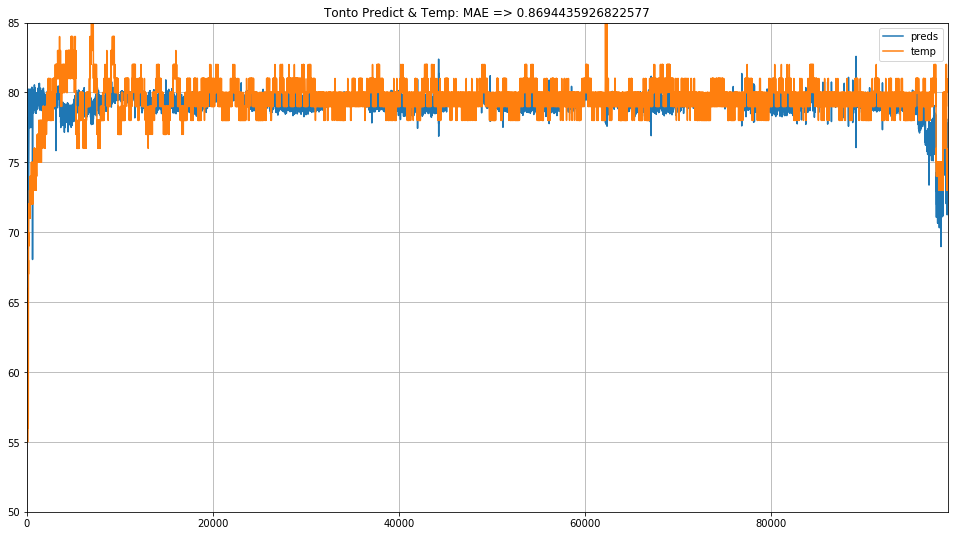

In [30]:
import matplotlib.pyplot as plt
testnum = 9 # range 0-10
testdata = datalist[testnum]
predicted = lr.predict(testdata.iloc[:,0:26])
resultData = pd.DataFrame(predicted, columns = ['preds'])
resultData['temp'] = testdata.iloc[:,27]
resultData.plot(figsize=(16.5,9), grid = 1, title= str((benchlist[testnum]).capitalize()) +" Predict & Temp: MAE => " + str(mean_absolute_error(predicted, testdata.iloc[:,27])), ylim=[50,85], xlim=[0,resultData.index.size])
plt.show()
# 0: astar
# 1: calculix
# 2: gamess
# 3: gcc
# 4: gobmk
# 5: mcf
# 6: povray
# 7: soplex
# 8: sphinx3
# 9: tonto
# 10: wrf

In [31]:
from sklearn.model_selection import cross_validate

lr = LinearRegression()

result = cross_validate(estimator=lr, X=All.iloc[:,:26], y=All.iloc[:,27], cv=10, return_train_score=True)
print("Train_Score: "+ str(result["train_score"]))
print("Test_Score: "+ str(result["test_score"]))

Train_Score: [0.22581287 0.21937679 0.22849849 0.23044594 0.2200494  0.20122217
 0.21919166 0.22882648 0.22574528 0.2289346 ]
Test_Score: [ 0.14814092  0.17528234  0.10025079  0.16280708  0.19743971  0.23518542
  0.22347435  0.07603894 -0.35248864  0.09747299]
